In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import IntegerType, StringType, FloatType
from pyspark.sql.types import Row

from pyspark.sql import SQLContext

In [2]:
spark.stop()

In [3]:
spark = SparkContext(master="local", appName="DataFrames")
sqlContext = SQLContext(spark)

In [4]:
!dir "files/""

 Volume in drive C has no label.
 Volume Serial Number is 4018-8CE2

 Directory of C:\Users\Cardo\Documents\Spark_platzi\files

02/15/2022  09:19 PM    <DIR>          .
02/15/2022  09:19 PM    <DIR>          ..
08/30/2020  01:47 PM               946 deporte.csv
08/30/2020  01:47 PM         2,764,536 deportista.csv
08/30/2020  01:47 PM         2,807,091 deportista2.csv
08/30/2020  01:47 PM         2,776,782 deportistaError.csv
08/30/2020  01:47 PM            33,262 evento.csv
08/30/2020  01:47 PM             1,978 juegos.csv
08/30/2020  01:47 PM           255,853 modelo_relacional.jpg
08/30/2020  01:47 PM            23,606 paises.csv
08/30/2020  01:47 PM         6,172,796 resultados.csv
               9 File(s)     14,836,850 bytes
               2 Dir(s)  187,236,212,736 bytes free


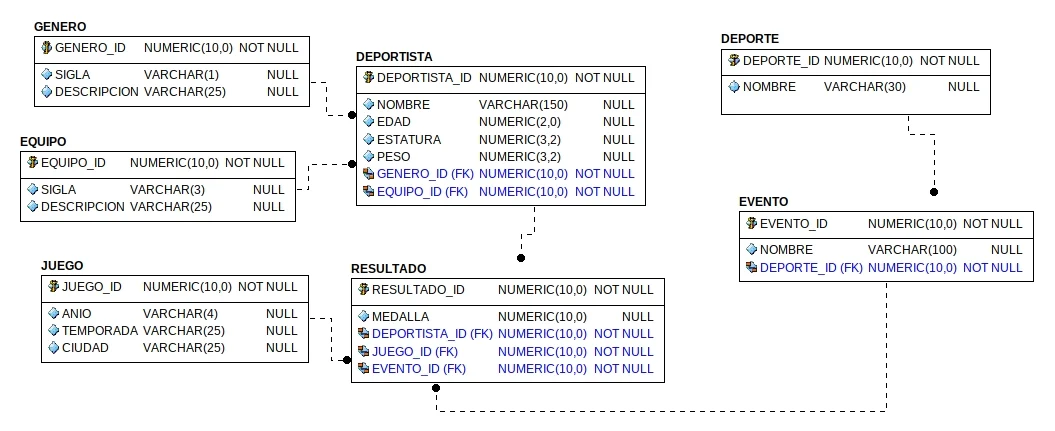

In [5]:
juegoSchema =StructType([
    StructField("juego_id", IntegerType(), False),
    StructField("anio", StringType(), False),
    StructField("temporada", StringType(), False),
    StructField("ciudad", StringType(), False)
])

path = "files/"

juegoDF = sqlContext.read.schema(juegoSchema)\
    .option("header", "true").csv(path+"juegos.csv")

In [6]:
juegoDF.show(4)

+--------+-----------+---------+------+
|juego_id|       anio|temporada|ciudad|
+--------+-----------+---------+------+
|       1|1896 Verano|     1896|Verano|
|       2|1900 Verano|     1900|Verano|
|       3|1904 Verano|     1904|Verano|
|       4|1906 Verano|     1906|Verano|
+--------+-----------+---------+------+
only showing top 4 rows



In [7]:
spark

<SparkContext master=local appName=DataFrames>

In [8]:
deportistaOlimpicoRDD = spark.textFile(path+"deportista.csv")\
    .map(lambda l: l.split(","))
deportistaOlimpicoRDD2 = spark.textFile(path+"deportista2.csv")\
    .map(lambda l: l.split(","))

deportistaOlimpicoRDD = deportistaOlimpicoRDD.union(deportistaOlimpicoRDD2)
deportistaOlimpicoRDD.take(5)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278']]

In [9]:
def eliminaEncabezado(indice, iterador):
    return iter(list(iterador)[1:])

In [10]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD.mapPartitionsWithIndex(eliminaEncabezado)
deportistaOlimpicoRDD.take(5)

[['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278'],
 ['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705']]

In [11]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD.map(lambda l: (
int(l[0]),
l[1],
int(l[2]),
int(l[3]),
int(l[4]),
float(l[5]),
int(l[6])
))

In [12]:
deportistaSchema =StructType([
    StructField("deportista_id", IntegerType(), False),
    StructField("nombre", StringType(), False),
    StructField("genero", IntegerType(), False),
    StructField("edad", IntegerType(), False),
    StructField("estatura", IntegerType(), False),
    StructField("peso", FloatType(), False),
    StructField("equipo_id", IntegerType(), False)
])

In [13]:
deportistaDF = sqlContext.createDataFrame(deportistaOlimpicoRDD, deportistaSchema)

In [14]:
resultadoSchema = StructType([
    StructField("resultado_id", IntegerType(), False),
    StructField("medalla", StringType(),False),
    StructField("deportista_id", IntegerType(), False),
    StructField("juego_id", IntegerType(), False),
    StructField("evento_id", IntegerType(), False)
])
resultadoDF = sqlContext.read.schema(resultadoSchema)\
    .option("header", "true").csv(path+"resultados.csv")

In [15]:
resultadoDF.show(5)

+------------+-------+-------------+--------+---------+
|resultado_id|medalla|deportista_id|juego_id|evento_id|
+------------+-------+-------------+--------+---------+
|           1|     NA|            1|      39|        1|
|           2|     NA|            2|      49|        2|
|           3|     NA|            3|       7|        3|
|           4|   Gold|            4|       2|        4|
|           5|     NA|            5|      36|        5|
+------------+-------+-------------+--------+---------+
only showing top 5 rows



In [16]:
eventoSchema = StructType([
    StructField("evento_id", IntegerType(), False),
    StructField("evento", StringType(), False),
    StructField("deporte_id", IntegerType(), False)
])

eventoDF = sqlContext.read.schema(eventoSchema)\
    .option("header", "true").csv(path+"evento.csv")

In [17]:
eventoDF.show(5)

+---------+--------------------+----------+
|evento_id|              evento|deporte_id|
+---------+--------------------+----------+
|        1|Basketball Men's ...|         1|
|        2|Judo Men's Extra-...|         2|
|        3|Football Men's Fo...|         3|
|        4|Tug-Of-War Men's ...|         4|
|        5|Speed Skating Wom...|         5|
+---------+--------------------+----------+
only showing top 5 rows



In [18]:
deporteSchema = StructType([
    StructField("deporte_id", IntegerType(), False),
    StructField("deporte", StringType(), False)
])

deporteDF = sqlContext.read.schema(deporteSchema)\
    .option("header", "true").csv(path+"deporte.csv")

In [19]:
deporteDF.show(5)

+----------+-------------+
|deporte_id|      deporte|
+----------+-------------+
|         1|   Basketball|
|         2|         Judo|
|         3|     Football|
|         4|   Tug-Of-War|
|         5|Speed Skating|
+----------+-------------+
only showing top 5 rows



In [20]:
equipoSchema = StructType([
    StructField("equipo_id", IntegerType(), False),
    StructField("equipo", StringType(), False),
    StructField("sigla", StringType(), False)
])

equipoDF = sqlContext.read.schema(equipoSchema)\
    .option("header","true").csv(path+"paises.csv")

In [21]:
equipoDF.show(5)

+---------+--------------------+-----+
|equipo_id|              equipo|sigla|
+---------+--------------------+-----+
|        1|         30. Februar|  AUT|
|        2|A North American ...|  MEX|
|        3|           Acipactli|  MEX|
|        4|             Acturus|  ARG|
|        5|         Afghanistan|  AFG|
+---------+--------------------+-----+
only showing top 5 rows



In [22]:
deportistaDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- genero: integer (nullable = false)
 |-- edad: integer (nullable = false)
 |-- estatura: integer (nullable = false)
 |-- peso: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [23]:
#renombrar genero -> sexo y remover columna estatura
deportistaDF = deportistaDF.withColumnRenamed("genero","sexo").drop("estatura")

In [24]:
deportistaDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- sexo: integer (nullable = false)
 |-- edad: integer (nullable = false)
 |-- peso: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [25]:
#otra forma más eficiente de renombrar columnas edad -> edadAlJugar
from pyspark.sql.functions import *
deportistaDF = deportistaDF.select("deportista_id", "nombre",
                   col("edad").alias("edadAlJugar"), "equipo_id")

In [26]:
deportistaDF.show(5)

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|            1|           A Dijiang|         24|      199|
|            2|            A Lamusi|         23|      199|
|            3| Gunnar Nielsen Aaby|         24|      273|
|            4|Edgar Lindenau Aabye|         34|      278|
|            5|Christine Jacoba ...|         21|      705|
+-------------+--------------------+-----------+---------+
only showing top 5 rows



In [27]:
deportistaDF = deportistaDF.filter(deportistaDF.edadAlJugar != 0)

In [28]:
deportistaDF.sort("EdadAlJugar").show(5)

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|        71691|  Dimitrios Loundras|         10|      333|
|        52070|        Etsuko Inada|         11|      514|
|        40129|    Luigina Giavotti|         11|      507|
|        37333|Carlos Bienvenido...|         11|      982|
|        47618|Sonja Henie Toppi...|         11|      742|
+-------------+--------------------+-----------+---------+
only showing top 5 rows



In [29]:
deportistaDF.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- edadAlJugar: integer (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [30]:
resultadoDF.printSchema()

root
 |-- resultado_id: integer (nullable = true)
 |-- medalla: string (nullable = true)
 |-- deportista_id: integer (nullable = true)
 |-- juego_id: integer (nullable = true)
 |-- evento_id: integer (nullable = true)



In [31]:
juegoDF.printSchema()

root
 |-- juego_id: integer (nullable = true)
 |-- anio: string (nullable = true)
 |-- temporada: string (nullable = true)
 |-- ciudad: string (nullable = true)



In [32]:
deporteDF.printSchema()

root
 |-- deporte_id: integer (nullable = true)
 |-- deporte: string (nullable = true)



In [33]:
juegoDF.printSchema()

root
 |-- juego_id: integer (nullable = true)
 |-- anio: string (nullable = true)
 |-- temporada: string (nullable = true)
 |-- ciudad: string (nullable = true)



In [34]:
deportistaDF.join(resultadoDF, 
                  deportistaDF.deportista_id == resultadoDF.deportista_id,
                 "left")\
                .join(juegoDF,
                     juegoDF.juego_id == resultadoDF.juego_id,
                     "left")\
                .join(eventoDF,
                     eventoDF.evento_id == resultadoDF.evento_id,
                     "left")\
                .join(deporteDF,
                     deporteDF.deporte_id == eventoDF.deporte_id,
                     "left")\
                .select("nombre", "edadAlJugar", "medalla",
                        col("anio").alias("AñoDeJuego"), "deporte").show(5)

+--------------------+-----------+-------+-------------+-------------+
|              nombre|edadAlJugar|medalla|   AñoDeJuego|      deporte|
+--------------------+-----------+-------+-------------+-------------+
|           A Dijiang|         24|     NA|  1992 Verano|   Basketball|
|            A Lamusi|         23|     NA|  2012 Verano|         Judo|
| Gunnar Nielsen Aaby|         24|     NA|  1920 Verano|     Football|
|Edgar Lindenau Aabye|         34|   Gold|  1900 Verano|   Tug-Of-War|
|Christine Jacoba ...|         21|     NA|1994 Invierno|Speed Skating|
+--------------------+-----------+-------+-------------+-------------+
only showing top 5 rows



In [35]:
resultadoDF.filter(resultadoDF.medalla != "NA")\
            .join(deportistaDF, resultadoDF.deportista_id == deportistaDF.deportista_id, "left")\
            .join(equipoDF,equipoDF.equipo_id == deportistaDF.equipo_id,"left")\
            .select(col("medalla").alias("Medalla ganadora"), "sigla", "equipo")\
            .sort(col("sigla").desc()).show(10)

+----------------+-----+--------+
|Medalla ganadora|sigla|  equipo|
+----------------+-----+--------+
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
|            Gold|  ZIM|Zimbabwe|
+----------------+-----+--------+
only showing top 10 rows



In [36]:
medallistaXAnio = deportistaDF\
    .join(resultadoDF, deportistaDF.deportista_id == resultadoDF.deportista_id,"left")\
    .join(juegoDF, juegoDF.juego_id == resultadoDF.juego_id, "left")\
    .join(equipoDF, equipoDF.equipo_id == deportistaDF.equipo_id, "left")\
    .join(eventoDF, eventoDF.evento_id == resultadoDF.evento_id, "left")\
    .join(deporteDF, deporteDF.deporte_id == eventoDF.deporte_id)\
    .select("sigla", "anio", "medalla", eventoDF.evento.alias("Nombre subdisciplina"),
            deporteDF.deporte.alias("Nombre disciplina"), deportistaDF.nombre)\
    .filter(equipoDF.sigla != "null")

In [37]:
medallistaXAnio.show(10)

+-----+-------------+-------+--------------------+-----------------+--------------------+
|sigla|         anio|medalla|Nombre subdisciplina|Nombre disciplina|              nombre|
+-----+-------------+-------+--------------------+-----------------+--------------------+
|  CHN|  1992 Verano|     NA|Basketball Men's ...|       Basketball|           A Dijiang|
|  CHN|  2012 Verano|     NA|Judo Men's Extra-...|             Judo|            A Lamusi|
|  DEN|  1920 Verano|     NA|Football Men's Fo...|         Football| Gunnar Nielsen Aaby|
|  SWE|  1900 Verano|   Gold|Tug-Of-War Men's ...|       Tug-Of-War|Edgar Lindenau Aabye|
|  NED|1994 Invierno|     NA|Speed Skating Wom...|    Speed Skating|Christine Jacoba ...|
|  NED|1994 Invierno|     NA|Speed Skating Wom...|    Speed Skating|Christine Jacoba ...|
|  NED|1992 Invierno|     NA|Speed Skating Wom...|    Speed Skating|Christine Jacoba ...|
|  NED|1992 Invierno|     NA|Speed Skating Wom...|    Speed Skating|Christine Jacoba ...|
|  NED|198

In [38]:
medallistaXAnio2 = medallistaXAnio.filter(medallistaXAnio.medalla != "NA")\
    .sort("anio")\
    .groupBy("sigla", "anio","Nombre subdisciplina")\
    .count()

In [39]:
medallistaXAnio2.printSchema()

root
 |-- sigla: string (nullable = true)
 |-- anio: string (nullable = true)
 |-- Nombre subdisciplina: string (nullable = true)
 |-- count: long (nullable = false)



In [40]:
medallistaXAnio2.groupBy("sigla", "anio")\
    .agg(sum("count").alias("Total medallas"),
        avg("count").alias("Medallas promedio"))\
    .sort("anio",col("Total medallas").desc()).show(10)

+-----+-----------+--------------+------------------+
|sigla|       anio|Total medallas| Medallas promedio|
+-----+-----------+--------------+------------------+
|  GER|1896 Verano|            30|               2.5|
|  USA|1896 Verano|            20|1.6666666666666667|
|  FRA|1896 Verano|            11|             1.375|
|  GRE|1896 Verano|             9|1.2857142857142858|
|  GBR|1896 Verano|             8|1.1428571428571428|
|  DEN|1896 Verano|             6|               1.0|
|  HUN|1896 Verano|             6|               1.0|
|  AUT|1896 Verano|             5|               1.0|
|  AUS|1896 Verano|             3|               1.0|
|  SUI|1896 Verano|             3|               1.0|
+-----+-----------+--------------+------------------+
only showing top 10 rows



In [41]:
resultadoDF.registerTempTable("resultado")
deportistaDF.registerTempTable("deportista")
equipoDF.registerTempTable("paises")

In [42]:
sqlContext.sql("SELECT * FROM deportista").show(5)

+-------------+--------------------+-----------+---------+
|deportista_id|              nombre|edadAlJugar|equipo_id|
+-------------+--------------------+-----------+---------+
|            1|           A Dijiang|         24|      199|
|            2|            A Lamusi|         23|      199|
|            3| Gunnar Nielsen Aaby|         24|      273|
|            4|Edgar Lindenau Aabye|         34|      278|
|            5|Christine Jacoba ...|         21|      705|
+-------------+--------------------+-----------+---------+
only showing top 5 rows



In [43]:
sqlContext.sql("""
                SELECT medalla, equipo, sigla FROM resultado r
                JOIN deportista d
                ON r.deportista_id = d.deportista_id
                JOIN paises p
                ON p.equipo_id = d.equipo_id
                WHERE medalla <> "NA"
                ORDER BY sigla DESC
                """).show(10)

+-------+--------+-----+
|medalla|  equipo|sigla|
+-------+--------+-----+
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
| Bronze|Zimbabwe|  ZIM|
|   Gold|Zimbabwe|  ZIM|
| Silver|Zimbabwe|  ZIM|
+-------+--------+-----+
only showing top 10 rows



In [44]:
spark

<SparkContext master=local appName=DataFrames>

In [45]:
deportistaErroSchema = StructType([
    StructField("deportista_id", StringType(), False),
    StructField("nombre", StringType(), False),
    StructField("genero", StringType(), False),
    StructField("edad", StringType(), False),
    StructField("altura", StringType(), False),
    StructField("peso", StringType(), False),
    StructField("equipo_id", StringType(), False)
])

deportistaErrorDF = sqlContext.read.schema(deportistaErroSchema)\
    .option("header", "true").csv(path+"deportistaError.csv")

In [46]:
deportistaErrorDF.show(5)

+-------------+--------------------+------+----+------+----+---------+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|
+-------------+--------------------+------+----+------+----+---------+
|            1|           A Dijiang|     1|  24|   180|  80|      199|
|            2|            A Lamusi|     1|  23|   170|  60|      199|
|            3| Gunnar Nielsen Aaby|     1|  24|  null|null|      273|
|            4|Edgar Lindenau Aabye|     1|  34|  null|null|      278|
|            5|Christine Jacoba ...|     2|  21|   185|  82|      705|
+-------------+--------------------+------+----+------+----+---------+
only showing top 5 rows



In [47]:
from pyspark.sql.functions import udf

def conversionNull(valor):
    return float(valor) if valor else 0.0

conversionNull_udf = udf(lambda z: conversionNull(z), FloatType())
sqlContext.udf.register("conversionNull_udf", conversionNull_udf)

<function __main__.<lambda>(z)>

In [48]:
deportistaErrorDF.select(conversionNull_udf(deportistaErrorDF.altura)).show()

+----------------+
|<lambda>(altura)|
+----------------+
|           180.0|
|           170.0|
|             0.0|
|             0.0|
|           185.0|
|           188.0|
|           183.0|
|           168.0|
|           186.0|
|             0.0|
|           182.0|
|           172.0|
|           159.0|
|           171.0|
|             0.0|
|           184.0|
|           175.0|
|           189.0|
|             0.0|
|           176.0|
+----------------+
only showing top 20 rows



### Persistencia y replicación

In [51]:
from pyspark.storagelevel import StorageLevel

In [52]:
medallistaXAnio.is_cached

False

In [54]:
#poner rdd de medallistaXAnio en memoria RAM
medallistaXAnio.rdd.cache()

MapPartitionsRDD[162] at javaToPython at <unknown>:0

In [55]:
#Ver documentación de StorageLevel
medallistaXAnio.rdd.getStorageLevel()

StorageLevel(False, True, False, False, 1)

In [57]:
# para cambiar el StrageLevel de un rdd, primero hay que remover su persistencia, de lo contrario sale error
medallistaXAnio.rdd.unpersist()

MapPartitionsRDD[162] at javaToPython at <unknown>:0

In [58]:
#Asignar nueva persistencia a rdd
medallistaXAnio.rdd.persist(StorageLevel.MEMORY_AND_DISK_2)

MapPartitionsRDD[162] at javaToPython at <unknown>:0

In [59]:
#Crear nuevo tipo de persistencia
StorageLevel.MEMORY_AND_DISK_3 = StorageLevel(True, True, False, False, 3)

In [60]:
medallistaXAnio.rdd.unpersist()

MapPartitionsRDD[162] at javaToPython at <unknown>:0

In [61]:
#asignar persistencia creada
medallistaXAnio.rdd.persist(StorageLevel.MEMORY_AND_DISK_3)

MapPartitionsRDD[162] at javaToPython at <unknown>:0

In [62]:
spark.stop()